## This project is based off a video by Matt Parker on Stand Up Maths (YouTube channel.) 

We will use Binet's formula to calculate the $n^{th}$ fibbonacci number. Usually, this is to be used with integer values of $n$, but we can substitute in real values and even complex values as shown below. 

In [1]:
#Definitions and imports. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

#Colors for our plot.
e_col = [0,0.5,1,0.6]
f_col = [0,0.7,1,0.7]

#The resolution of our 3D surface plots. 
res = 30

#The golden ratio. 
gr = (1+math.sqrt(5))/2

#Converting from radians to degrees. 
def degree(x):
    pi = math.pi
    return (x*180)/pi

def fib(n):
    f = complex(math.sqrt(5),0)
    a = complex((1+f)/2,0)**n
    b = complex((1-f)/2) ** n
    return (a-b)/f

print(fib(0),fib(1),fib(2),fib(3),fib(4),fib(5),fib(6),"...")

0j (1+0j) (1+0j) (2+0j) (3+0j) (5+0j) (8+0j) ...


Here, we are simply plugging real values into Binet't formula to get complexed output. This gives us a paramaterized curve of fibonacci numbers. In the code below, I am graphing the fibonacci numbers between zero and the 5th fibonacci number.

In [2]:
#Get the series of numbers we will be using. 
n = 5
xs = np.linspace(0,n,2000)
ys =[]
for x in xs: 
    ys.append(fib(x))

reals = []
imags = []

for y in ys: 
    reals.append(y.real)
    imags.append(y.imag)

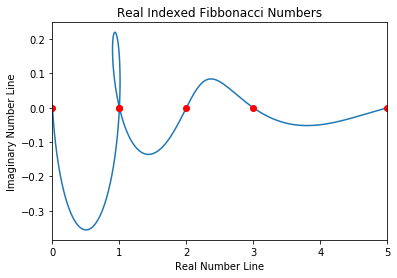

In [3]:
#Graph the results. 
data = pd.DataFrame({'real':reals, 'imaginary':imags})
data.set_index('real')['imaginary'].plot()
plt.title("Real Indexed Fibbonacci Numbers")
plt.xlabel("Real Number Line")
plt.ylabel("Imaginary Number Line")

#Highlight the zeros of this graph. (Just the first n fibbonacci numbers.)
zx = []
zy = []
for i in range(n+1):
    zx.append(fib(i).real)
    zy.append(0.0)
plt.plot(zx, zy, 'ro')

Notice how the line crosses the x-axis at all of the fibonacci numbers. This is because all of the fibonacci numbers are real numbers and dont have an imaginary component. Also, notice how in the fibonacci sequence (0,1,1,2,3,5,8...) one occurs twice. This can be seen in the graph because it loops back on itself and intersects itself at (1,0)!

We can do the same thing with the fibonacci numbers going from zero toward negitive infinity! In the code below, I do the same thing as above, except with the "negitive" (alghough every other one is positive) fibonacci numbers. 

In [4]:
#Get the series of negitive fibbonacci numbers that we will be using. 
n = 9
xs = np.linspace(0,-n,20000)
ys =[]
for x in xs: 
    ys.append(fib(x))

reals = []
imags = []

for y in ys: 
    reals.append(y.real)
    imags.append(y.imag)

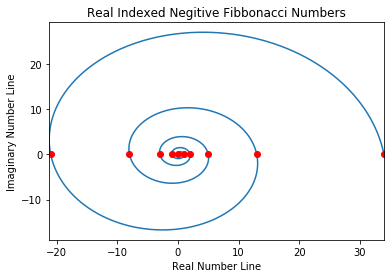

In [5]:
#Graph the results for the negitives. 
data = pd.DataFrame({'real':reals, 'imaginary':imags})
data.set_index('real')['imaginary'].plot()
plt.title("Real Indexed Negitive Fibbonacci Numbers")
plt.xlabel("Real Number Line")
plt.ylabel("Imaginary Number Line")

#Highlight the zeros of this graph. (Just the first n fibbonacci numbers.)
zx = []
zy = []
for i in range(0,n+1):
    zx.append(fib(-i).real)
    zy.append(0.0)
plt.plot(zx, zy, 'ro')

We see in this graph, that the negitive fibonacci numbers alternate from positive to negitive. This results in the spiral. The first question that I have is whether or not this graph forms a fibonacci spiral.

## Now we can also provide fibonacci numbers based on complexed input. 
We can represent one aspect of the complex output of the function as the height of a surface over the complex plane.

In [6]:
#Imports for 3D. 
from mpl_toolkits.mplot3d import Axes3D

Below, we will represent the imaginary component as the height of the surface over the complex plane.

In [7]:
#Now we can plot the imaginary component of complex indexed fibbonacci numbers. 
X = []
Y = []
Z = []

n = 2

for x in np.linspace(-n,n,res):
    for y in np.linspace(-n,n,res):
        X.append(x)
        Y.append(y)
        Z.append(fib(complex(x,y)).imag)

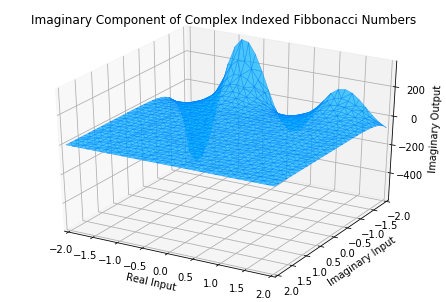

In [8]:
#Make a surface plot of the imaginary component. 
fig = plt.figure()
ax = Axes3D(fig)

df = pd.DataFrame({'x':X, 'y': Y, 'z':Z}, index=range(len(X)))

surf = ax.plot_trisurf(df.x,df.y,df.z, linewidth=0.5)

ax.set_title("Imaginary Component of Complex Indexed Fibbonacci Numbers")
ax.set_xlabel("Real Input")
ax.set_ylabel("Imaginary Input")
ax.set_zlabel("Imaginary Output")
plt.axis([-n, n, n, -n])

surf.set_edgecolors(e_col)
surf.set_facecolors(f_col)

plt.show()

We can do the same thing as above except we will represent the real component as the height of the surface.

In [9]:
#Do the same thing as above except this time, we will plot the real component. 
X = []
Y = []
Z = []

n = 2

for x in np.linspace(-n,n,res):
    for y in np.linspace(-n,n,res):
        X.append(x)
        Y.append(y)
        Z.append(fib(complex(x,y)).real)

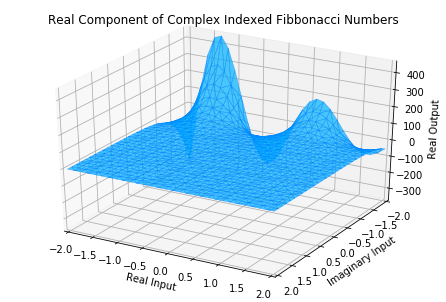

In [10]:
#Make a surface plot of the real component. 
fig = plt.figure()
ax = Axes3D(fig)

df = pd.DataFrame({'x':X, 'y': Y, 'z':Z}, index=range(len(X)))

surf = ax.plot_trisurf(df.x,df.y,df.z,linewidth=0.5)

ax.set_title("Real Component of Complex Indexed Fibbonacci Numbers")
ax.set_xlabel("Real Input")
ax.set_ylabel("Imaginary Input")
ax.set_zlabel("Real Output")
plt.axis([-n, n, n, -n])


surf.set_edgecolors(e_col)
surf.set_facecolors(f_col)

plt.show()

Finally, we can represent the magnatude or length of the complex output as the height of the surface.

In [11]:
#Do the same thing as above except this time, we will plot the length (magnitude) of the number. 
X = []
Y = []
Z = []

n = 2

for x in np.linspace(-n,n,res):
    for y in np.linspace(-n,n,res):
        X.append(x)
        Y.append(y)
        Z.append(abs(fib(complex(x,y))))

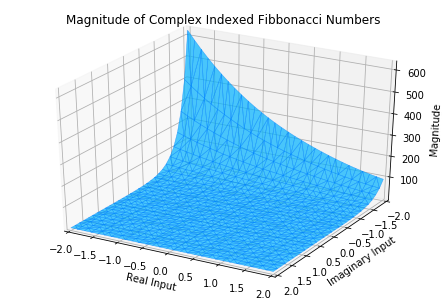

In [12]:
#Make a surface plot of the lengths. 
fig = plt.figure()
ax = Axes3D(fig)

df = pd.DataFrame({'x':X, 'y': Y, 'z':Z}, index=range(len(X)))

surf = ax.plot_trisurf(df.x,df.y,df.z, linewidth=0.5)

ax.set_title("Magnitude of Complex Indexed Fibbonacci Numbers")
ax.set_xlabel("Real Input")
ax.set_ylabel("Imaginary Input")
ax.set_zlabel("Magnitude")
plt.axis([-n, n, n, -n])

surf.set_edgecolors(e_col)
surf.set_facecolors(f_col)

plt.show()

I am unable to make interactive plots inside of a jupyter notebook, but if you wish to interact with these plots, then you can use 
`fig.show()` instead of `plt.show()` inside another python interpreter.